# COGS 108 - Measuring The Increase Of Sad Songs In 2020



- Andrei Sebald
- Sidney Lodovico Hendricks
- Maximillian Halvax
- Ehson Pirouzian

# Overview

With this project our goal is to formally quantify if music has seen a shift into a more 'sadder' tone for the year 2020 compared to other years. Our team decided to analyze a spotify dataset that contained values across many years in order to compare 2020 with other years. We found out that variables such as valence, mode, and explicitness are key factors in songs that represent 'sad' characteristics. Our results indicate that there is a clear shift toward sadder music in these variables from other years leading into 2020.

<a id='research_question'></a>
# Research Question

During 2020 and the pandemic was there a significant increase in 'sad' songs compared to years prior?

## Background and Prior Work

The 2020 pandemic has majorly impacted peoples lives for the most part in a negative way. Individuals are experiencing loss of loved ones and spending much more time alone and at home. Music is often related to the current events going on in the world, and we are interested to see how the pandemic has impacted the songs produced in 2020. 

In the past, music has been reflective of the hard times individuals in society face. One example is the Vietnam War. During the war, "music began to reflect anti-war sentiment and a painfully true commentary on the war’s effects on both soldiers and those still at home"(1). We are interested in looking at if the music produced in 2020 is different than years prior during the pandemic. 

While music is often similar to what is going on in society, it also serves as a coping mechanism and an escape from reality. Thus during hard times, positive music may be used to lift people's spirits. Although during the Vietnam War and World War II music was reflective of society at the time, in more recent years as a result of technological advancements, music serves as a sense of comfort for individuals and as a way to "cope and deal with the stress of war"(2). 

We are interested in looking at whether the songs produced in 2020 were more or less "sad" than years prior. "Sad" songs can be characterized by traits including Mode, Tempo, Beat, and lyrics. Using these aspects once can define a song as generally following a sad tone(3). In addition, the trait of valence can be described as the "musical positiveness conveyed by a track. Tracks wit high valence sound more positive... while tracks with low valence sound more negative" (5). 

There has been some research done on the correlation between the individual genres and 2020, and there was no significant correlation (4). Besides this, there is not much research done on the difference in popular music in 2020 compared to years prior and how covid may have played a role in it.

References: 

1) https://www.michigandaily.com/section/arts/stop-what%E2%80%99s-sound-how-vietnam-war-changed-american-music

2) https://blog.ambient-mixer.com/benefits/the-importance-of-music-during-wars/#:~:text=History%20has%20shown%20us%20that,back%20thousand%20of%20years%20ago

3) https://www.psychologytoday.com/us/blog/your-musical-self/201709/what-makes-sad-music-sad

4) https://blog.chartmetric.com/covid-19-effect-on-the-global-music-business-part-1-genre/

5) https://community.spotify.com/t5/Spotify-for-Developers/Valence-as-a-measure-of-happiness/td-p/4385221


# Hypothesis
We hypothesize that there is a increase in "sad" songs produced in 2020 compared to years prior, determined by characteristics of a song including the valence, explicitness, and mode.

# Dataset
We need the data set to show the release dates of the songs for sure. The popularity of the songs and relevance would help us further account for the importance of some songs over others and view trends in the most popular songs. Perhaps another important aspect is how the data will represent the characteristics of the sogns like: livliness, energy, exlicity, beat, etc. If we could get a large dataset with all of the information we have then we could produce great results.
1. Spotify dataset 1921-2020 160k tracks

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

number of observations 
172230
This is a massive dataset describing many songs currently on spotify, spanning songs released from 1921-2020
more importantly, this dataset has many important measurements of features present in each song such as: tempo, acousticness, loudness, etc. which will be very helpful to determining if a song is positive or negative


We will also be looking at this figure as a way to guide our decision making as to whether a song is happy/sad positive/negative
https://www.researchgate.net/figure/Characteristics-of-happy-sad-activating-and-relaxing-music-This-systematized_fig1_254664268

# Setup

In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
filth_df = pd.read_csv("Data/data.csv")
filth_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


Above, we loaded the csv file containing data about every song released since 1920. We then cleaned the dataframe by sorting it by year ascending. This makes it easier to look at and follow. We removed the re-releases of songs preformed live by checking if a title contained the words "Live At" to determine if the song was a live re release from an old artist i.e. Frank Sinatra. On top of this, we dropped irrelevant columns such as "id" and "release_date". We don't need "release_date" because there is already a "year" column. Further, we dropped duplicates. 

In [39]:
cleaner_df = filth_df[~ filth_df["name"].str.contains("Live At")]
cleaner_df= cleaner_df.sort_values(by = "year", ascending = False)

clean_df = cleaner_df.drop(["id", "release_date"], axis = 1)
clean_df=clean_df.drop_duplicates()


# Data Analysis & Results (EDA)



Each observation in the dataset is in a separate row and represents a unique song produced. We plan to group the songs produced in 2020 and compare the attributes in the columns to those songs with songs produced prior to 2020. Specifically we are interested in valence, energy, danceability, liveness, and loudness.




In the below segment we can see that from 1920 to 1960 there are fewer songs, because we are taking the average of years before 2020, this shouldn't be an issue.

3654

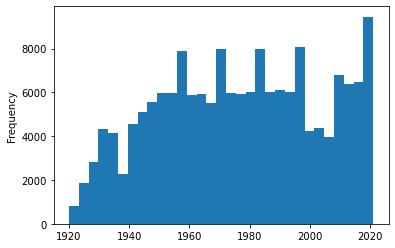

In [4]:
clean_df['year'].plot.hist(bins=31)
len(clean_df[clean_df['year'] == 2020])

We can see here that the ranges of our features are vastly different. It may be useful to make the values uniform to visualize them togethor later..

In [178]:
clean_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,57815.000000,57815.000000,5.781500e+04,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000,57815.000000
mean,0.267036,0.578339,2.449851e+05,0.632935,0.147142,0.169522,5.318049,0.209743,-8.678481,0.670034,37.327960,0.089125,121.553291,0.501040,2006.566116
std,0.312209,0.176864,1.623544e+05,0.244496,0.354250,0.318479,3.557993,0.184495,4.758516,0.470205,24.598028,0.104658,29.360218,0.260677,9.473405
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000
25%,0.010300,0.463000,1.871330e+05,0.471000,0.000000,0.000000,2.000000,0.094800,-10.440000,0.000000,9.000000,0.035100,98.054500,0.289000,1998.000000
50%,0.116000,0.590000,2.273470e+05,0.666000,0.000000,0.000086,5.000000,0.131000,-7.572000,1.000000,43.000000,0.048300,122.000000,0.499000,2008.000000
75%,0.469000,0.710000,2.762735e+05,0.836000,0.000000,0.091650,8.000000,0.275000,-5.578000,1.000000,56.000000,0.088900,138.861000,0.713500,2015.000000
max,0.996000,0.987000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.367000,1.000000,100.000000,0.962000,222.605000,1.000000,2021.000000


# Temporality
For this data set we originally had the temporality as one way, but cleaned it to be simpler for ease of use. At first we had the column "release date" which was inconsistent with its format

In [181]:
filth_df['release_date'].values

array(['1920', '1920-01-05', '1920', ..., '2020-12-09', '2021-01-07',
       '2020-12-09'], dtype=object)

Currently we've opted to use the column 'year' towards testing our hypothesis.

In [182]:
clean_df["year"].values

array([2021, 2021, 2021, ..., 1991, 1991, 1991])

The years used in the data set are the year in which the song was released to the public, since we've excluded live re-releases, songs that were not released in years outside our range will not be used

Ultimately the temporality of our dataset is very important to our hypothesis. The entire project lies upon release dates, so having a clean, so by getting a clean, simple, release date we made things easier for us throught answering our hypothesis

Below we make the "tempo", "key","loudness" and "popularity" values uniform from 0 to 1, we do this so we can visualize them later to potentially find outliers or "weird" data that may skew our results.

In [5]:
##makes tempo key loudness and popularity uniform on a scale of 0-1
uniform_df = clean_df
mms = preprocessing.MinMaxScaler()
uniform_df[['tempo','key','loudness','popularity']] = mms.fit_transform(clean_df[['tempo','key','loudness','popularity']])


In [6]:
clean_df['year'].value_counts()

2020    3654
2018    2576
2013    2349
2016    2228
2015    2186
        ... 
1925     279
1924     236
1923     185
1921     156
1922     121
Name: year, Length: 102, dtype: int64

Seems to be way more songs from 2020, but since we are just measuring average happiness there shouldn't be an issue

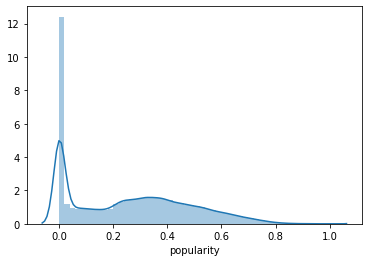

In [7]:
sns.distplot(clean_df.popularity)

We can see that there are several of songs with zero popularity and thus this may not be a good representation of music in a given year. Only one song has a popularity of one, and many more songs have a smaller popularity than larger. We can possibly investigate how popularity is being measured (# of plays? because then newer songs will have less listens)

Something we were worried about was that the inconsistencies in music style through the years would lead to inconsistencies in measures like "valence". Consequently, the average "valence" of years previous may be affected by different music era's and not be a good standard to compare to. 

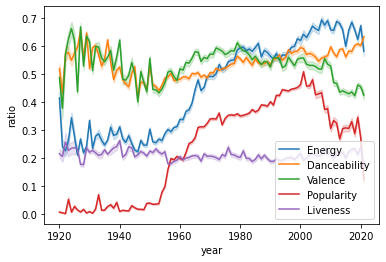

In [8]:
sns.lineplot(x=uniform_df['year'],y=uniform_df['energy'])
sns.lineplot(x=uniform_df['year'],y=uniform_df['danceability'])
sns.lineplot(x=uniform_df['year'],y=uniform_df['valence'])
sns.lineplot(x=uniform_df['year'],y=uniform_df['popularity'])
sns.lineplot(x=uniform_df['year'],y=uniform_df['liveness'])

plt.ylabel("ratio")


plt.legend(labels=['Energy','Danceability','Valence','Popularity','Liveness'])

Above, we are getting inconsistencies from years 1920 to 1960 so we have decided to filter the df from 1960 onwards.  

In [11]:
uniform_df=uniform_df[uniform_df.year>=1960]

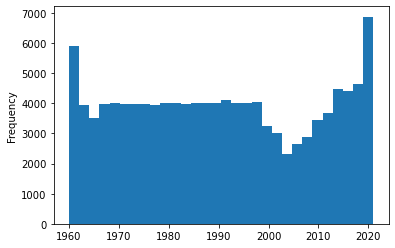

In [12]:
uniform_df.year.plot.hist(bins=30)

In [13]:
# we consider popular songs to be songs with a popularity over 0.6
popular_songs= uniform_df[uniform_df.popularity>0.6]

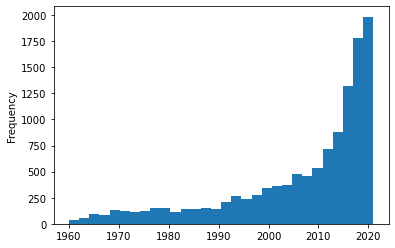

In [14]:
popular_songs.year.plot.hist(bins=30)

There seems to be more songs with greater popularity from later years. This likely means the popularity metric is based off of recent activity.  So for a more even distribution, we'll lower the popularity threshold.

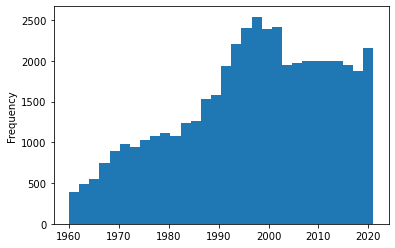

In [15]:
popular_songs= uniform_df[uniform_df.popularity>0.4]
popular_songs.year.plot.hist(bins=30)

That's better. This way, all previous years will be represented more equally.

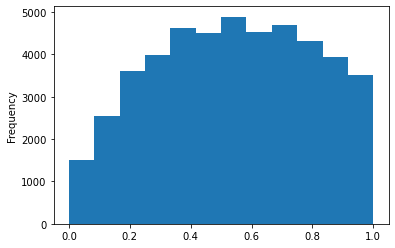

In [16]:
popular_songs.valence.plot.hist(bins=12)

# Faithfulness
There are concrete variables in this data set that we can faithfully rely on and there are abstract variables, determined by the creator of the data set, that are more questionable. It is not established in the description of the kaggle data set, how variables such as danceability and valence are determined. What I am looking for above is to see if valence is correlated with any other variables, in the hopes that it was maybe calculated based off of other concrete variables. There seems to be a small positive correlation between valence and three other variables: danceability, energy and loudness. This does not tell us much considering two of these variables themeselves are abstract. However, danceability, energy and valence do all have positive connotations, so it's good to see they are correlated. 

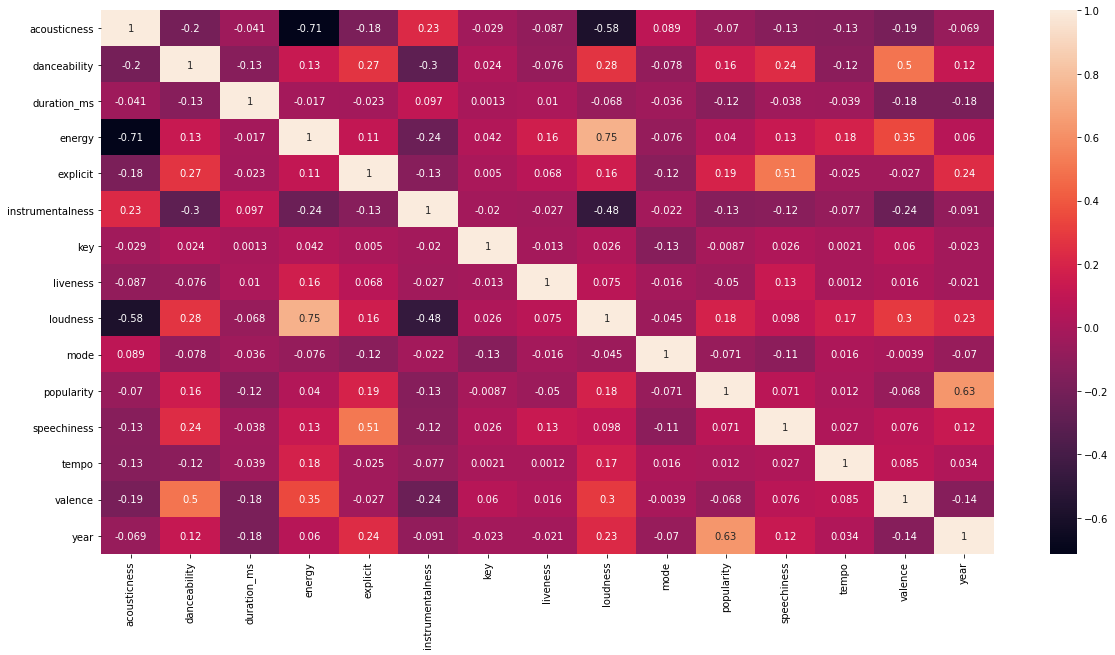

In [194]:
plt.figure(figsize=(20,10))
c= popular_songs.corr()
sns.heatmap(c, annot=True)


To determine the credibility of the valence metric, we printed out the songs highest in valence and listened to a few to see if they were indeed happy. I think anyone reading this would agree with the notion that these songs do have a "happier" mood to them.

In [195]:
popular_songs[popular_songs.valence>0.97]

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
126111,0.7250,['Aldo Trujillo'],0.746,163893,0.532,0,0.000007,0.909091,0.1010,0.815314,1,"Todos Hablan, Nada Saben",0.71,0.0649,0.545248,0.976,2018
126125,0.1650,"['Earth, Wind & Fire']",0.694,215080,0.831,0,0.000892,0.818182,0.2500,0.831853,1,September,0.70,0.0301,0.565580,0.980,2018
57856,0.1640,['Freddie Dredd'],0.880,93894,0.777,1,0.017100,0.636364,0.0957,0.838370,0,GTG,0.73,0.1250,0.696098,0.974,2018
126243,0.3180,['Morgan Wallen'],0.587,194720,0.888,0,0.000134,0.181818,0.0449,0.866981,1,Whatcha Know 'Bout That,0.62,0.0347,0.332526,0.976,2018
125419,0.0439,['Lemon Demon'],0.811,210815,0.315,1,0.000000,0.000000,0.1260,0.764594,1,A Mask of My Own Face,0.56,0.0438,0.449334,0.972,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70885,0.2970,['Daniela Romo'],0.882,269987,0.895,0,0.000049,0.272727,0.0625,0.840090,0,"Todo, Todo, Todo",0.46,0.0314,0.589996,0.977,1991
70733,0.6760,['Mike Laure'],0.567,151417,0.735,0,0.000000,0.454545,0.1260,0.864362,1,La Rajita De Canela,0.48,0.0617,0.801801,0.972,1991
70720,0.4320,['Joan Sebastian'],0.806,169691,0.366,0,0.000000,0.636364,0.1300,0.808323,1,La Prietita Que Yo Quiero,0.46,0.0833,0.510245,0.983,1991
70719,0.8500,['Joan Sebastian'],0.764,154749,0.363,0,0.000000,0.272727,0.0929,0.830290,1,En Un Jaripeo,0.46,0.2130,0.569749,0.972,1991


Here we split the data into two data sets: the first is songs from 2020 and the second is songs from before 2020 (remember they are still after 1960)

In [30]:
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
pop_songs_2020 = popular_songs[popular_songs.year == 2020]
pop_songs_before2020 = popular_songs[(popular_songs.year < 2020) ]

Both data sets have a pretty normal distribution.

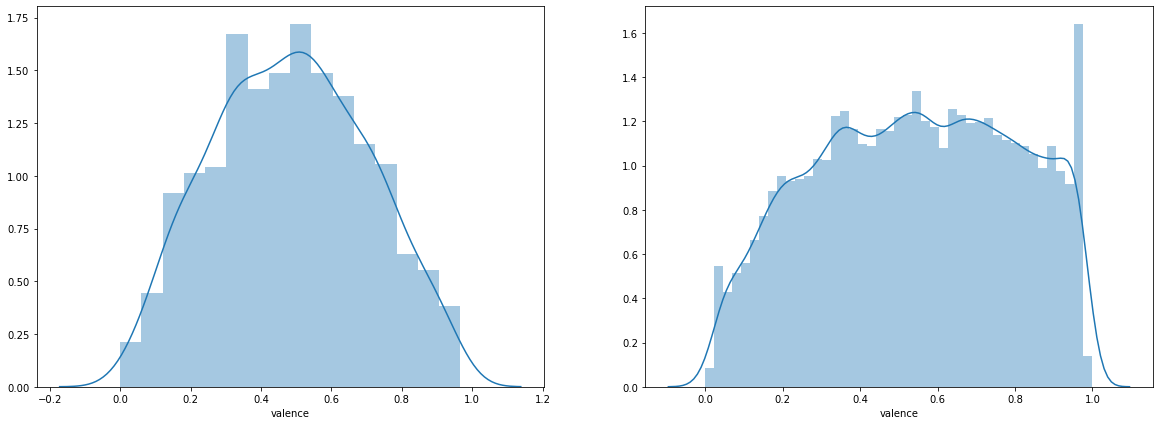

In [31]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(20, 7)
valence_2020 = sns.distplot(pop_songs_2020['valence'], ax=ax[0])
valence_before_2020 = sns.distplot(pop_songs_before2020['valence'], ax=ax[1])
fig.show(0)

In [32]:
popular_songs_truncated = popular_songs.copy()

Below, we change all values of year that are below 2020 to the string "1960-2019" so that we can easily form a boxplot after.

In [33]:

popular_songs_truncated.loc[popular_songs_truncated.year < 2020, "year"] = "1960-2019"

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
20182,0.4630,['Morgan Wallen'],0.633,156747,0.663,0,0.000000,0.909091,0.1080,0.860559,1,Warning,0.53,0.0294,0.472479,0.253,2021
20184,0.2440,['Morgan Wallen'],0.488,157440,0.748,0,0.000000,0.545455,0.1240,0.844899,1,More Surprised Than Me,0.52,0.0297,0.348811,0.431,2021
20186,0.0102,['Morgan Wallen'],0.592,226147,0.847,0,0.000040,1.000000,0.1580,0.857693,0,Neon Eyes,0.51,0.0285,0.517480,0.652,2021
20188,0.5990,['Morgan Wallen'],0.449,180787,0.518,0,0.002490,0.181818,0.0984,0.839872,1,Whiskey’d My Way,0.51,0.0271,0.763342,0.314,2021
20190,0.6650,['Morgan Wallen'],0.658,161773,0.539,0,0.000000,0.454545,0.1230,0.819450,1,Somebody’s Problem,0.51,0.0289,0.562444,0.622,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27442,0.8410,['Enrique Guzman'],0.385,220933,0.295,0,0.012200,0.181818,0.1080,0.754773,0,Uno de Tantos (Uno Dei Tanti),0.44,0.0337,0.330097,0.270,1960-2019
27429,0.7620,['Enrique Guzman'],0.326,158133,0.474,0,0.000000,0.363636,0.5090,0.813202,1,Mi Corazón Canta (All of a Sudden) [My Heart S...,0.43,0.0299,0.343547,0.345,1960-2019
27419,0.6670,['Charles Aznavour'],0.424,221413,0.294,0,0.000000,0.181818,0.3220,0.746441,1,Tu t'laisses aller,0.43,0.0392,0.520507,0.305,1960-2019
27334,0.7530,['Enrique Guzman'],0.287,156467,0.395,0,0.000000,0.000000,0.3730,0.769728,1,Payasito (Ponchinello) - Remasterizado,0.48,0.0353,0.489641,0.426,1960-2019


The boxplot below seems to demonstrate a difference in valence between the years 1960-2019 and the singular year 2020. But let's see if hypothesis testing demonstrates the same pattern...

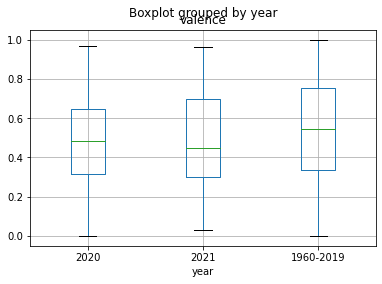

In [36]:
popular_songs_truncated.boxplot(column = "valence", by = "year")

# Hypothesis testing
We run 3 t-tests at a .05 significance level. 

## Test 1
The first test answers the following question: 
Did 2020 have an on average lower valence than years prior?

Null hypothesis: 2020 had the same valence as other songs in the dataset

Alternative: 2020 had lower valence than other songs in the dataset

In [252]:
valence_chart = popular_songs[["year","valence"]]

In [271]:
pop_songs_before2020["valence"] - overall_mean

19684    -0.326901
58046    -0.385901
19686     0.319099
58048    -0.108901
19692    -0.059901
            ...   
124789   -0.119901
56552     0.178099
56506    -0.313901
124791   -0.134901
124793    0.239099
Name: valence, Length: 8725, dtype: float64

In [281]:
overall_mean = popular_songs["valence"].mean()
pop_songs_2020["DOM"] = pop_songs_2020["valence"] - overall_mean
popular_songs["DOM"] = popular_songs["valence"] - overall_mean

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [288]:
observed_valence_diff = pop_songs_2020["DOM"].mean()

In [290]:
ttest_ind(pop_songs_2020["DOM"], popular_songs["DOM"])

Ttest_indResult(statistic=-4.082161837015231, pvalue=4.472408474929147e-05)

### Test 1 results: 
Due to the extremely low p-value < 0.05 we reject the null hypothesis in favor of the alternative. There is a significant difference in the valence of popular songs produced in 2020 compared to years prior. The test statistic is negative meaning that it is on the lower tail of the distribution showing a lower valence on average.

### Test 2
Null: The mode of songs in 2020 is similar to other years

Alternative: The mode of songs in 2020 is lower (more in minor than in major) than that of the other years 

In [298]:
overall_mean = popular_songs["mode"].mean()
pop_songs_2020["DOM_m"] = pop_songs_2020["mode"] - overall_mean
popular_songs["DOM_m"] = popular_songs["mode"] - overall_mean

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [299]:
ttest_ind(pop_songs_2020["DOM_m"], popular_songs["DOM_m"])

Ttest_indResult(statistic=-7.673476069844532, pvalue=1.720156188601468e-14)

### Test 2 Results
We reject the null hypothesis in favor of the alternative with a p-value of <.05

The test statistic is negative meaning that songs produced in 2020 have a lower mode on average.

### Test 3
Null: The explicitness of songs in 2020 is similar other years

Alt: The explicitness of songs in 2020 is higher than that of the other years 

In [300]:
overall_mean = popular_songs["explicit"].mean()
pop_songs_2020["DOM_e"] = pop_songs_2020["explicit"] - overall_mean
popular_songs["DOM_e"] = popular_songs["explicit"] - overall_mean

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [302]:
ttest_ind(pop_songs_2020["DOM_e"], popular_songs["DOM_e"])

Ttest_indResult(statistic=25.24378236766726, pvalue=2.8208015539415105e-139)

### Test 3 Results
We again Reject the null hypothesis in favor of the alternative. 

The test statistic is positive meaning that songs in 2020 appear to be more explicit.

# Ethics and Privacy

Are there any biases, privacy, or terms of use issues within the data we proposed?

Our dataset has biases in them. The first and most glaring bias is that we exclusively include data from only spotify and not from other platforms. This means that only songs found on spotify will be representative. Although we find that this should not affect our analysis since their library of music is already very large. Additionally there is no personal information besides the authors of music, though the authors purposely released their music out to the public. Additionally the dataset is under the Community Data License agreement, which allows us to have a right to use and share this dataset.

There are however other biases we can see in our dataset. Another important one is the fact our hypothesis targets 2020 as a year where sadder music could be produced. The year 2020 most likely is an outlier compared to other years due to the pandemic causing more people to be isolated. This bias is being tested for in our analysis to exactly see how much of an impact this has caused so this bias is why we are testing.

Another bias to keep track of is the difference in technology over the years. Older songs which are less popular will most likely not have been added to the dataset. In order to accurately compare the years we gather data from the songs within a certain threshold of popularity. This also resolvs the issue where we might compare unknown songs and artists, which do not represent a notable portion of listeners.

Our graphs and visualizations are meant to depict what the title describes them to be, in order to honestly respresent our findings. No PII has been divulged and the data is public so there is no need to securely store it.

The Last note that we will address is the outcome of our findings. If our findings turn out to be significant, which they are, 2020 will be seen as a profitable year to produce sad songs due to the currently societal trends. Therefore influencing the industry to perpetuate sad emotions during times of crisis. We found, using valence, Mode, and explicitness, that there was a reasonable impact on the emotions of songs. After the analysis finding that there is a difference in the popular songs produced we can see that society consumes songs that are tied to the emotions of society. This could influence these traits for songs created down the line.


# Conclusion and Discussion

In conclusion, we believe that there is a strong correlation between the state of society and the current happiness in music in the year 2020. In order to explore the effect that a pandemic has had on the overall sad and happy tones in music we compared the mode, explicitness and valence of songs in years before 2020 and 2020 itself. The data is coming from our spotify API based dataset. 

In order to compare music we used a spotify API based dataset that contains music with the year of publication listed. With this information we are able to view popular songs across the years. One step we overcame early on was eliminating values that were rereleased songs, or song duplicates that were concert songs. After we have cleaned up our data we began exploratory analysis on the data that was cleaned. With the clean data we infered that we want to keep the songs that are relatively popular and not unknown songs or songs that do not represent a large porition of soceity. After understanding our data more we began our analysis. Our analysis consisted of finding whether or not the valence was normally distributed in order to do T-testing. We then did T-Tests on the difference of means of the values: valence, mode and explicitness among songs in the years near 2020 and the year 2020. Using the background information we gathered we knew that explicitness, mode, and valence of a song can represent its overall tone, and with the mode of 2020 representing minor key, the explicitness being higher and the valence being lower in 2020. This will represent an overall sadder year for music being made. 

We had a few limitations to our project. We were confused by the exact value that popularity was describing and we reached out to the creator of the dataset to question him on this topic, though he never returned a response. So we instead assumed the meaning of popularity. Another limitation to our project was that we did not test to see if instead of covid causing this that music's tone in general was changing. In order to test for this we would need more specific data on the years leading up to the pandemic and the years following the pandemic.

The impact of our work on society could be large, our results indicate that a shift toward sadder and more depressing music during times of national hardship lead to more popular songs. The implication that artists should create and express music that has a sad undertone will lead to shifts in the music industry as well as the thoughts and emotions of the people themselves. With more people being fed sadder material, then we can expect to see a national shift of happiness and productivity. It should be mentioned that after the changes to society have passed, the happiness in music will return to normal. Though we never tested for this and this is another limitation to our project.